In [1]:
##importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
## loading dataset

boston = load_boston()
MEDV=pd.DataFrame(boston.target)
data = pd.DataFrame(boston.data,columns=boston.feature_names)

print (data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [3]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

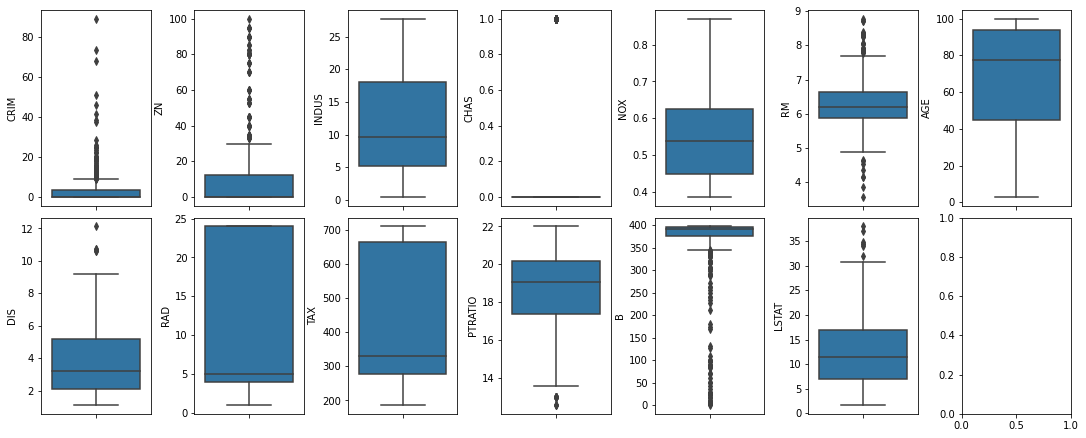

In [4]:
## barplots for the features

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)


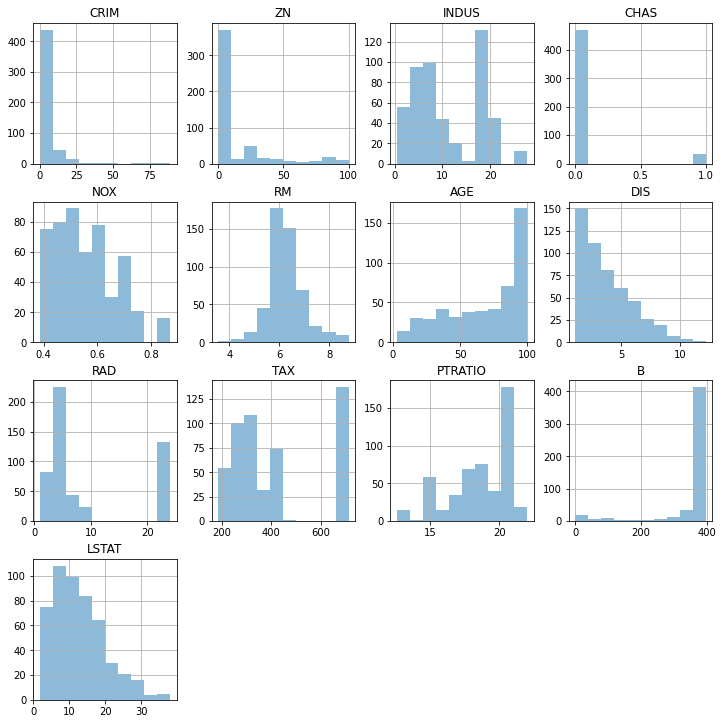

In [5]:
##hist plots 

data.hist(alpha=0.5,figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.show()

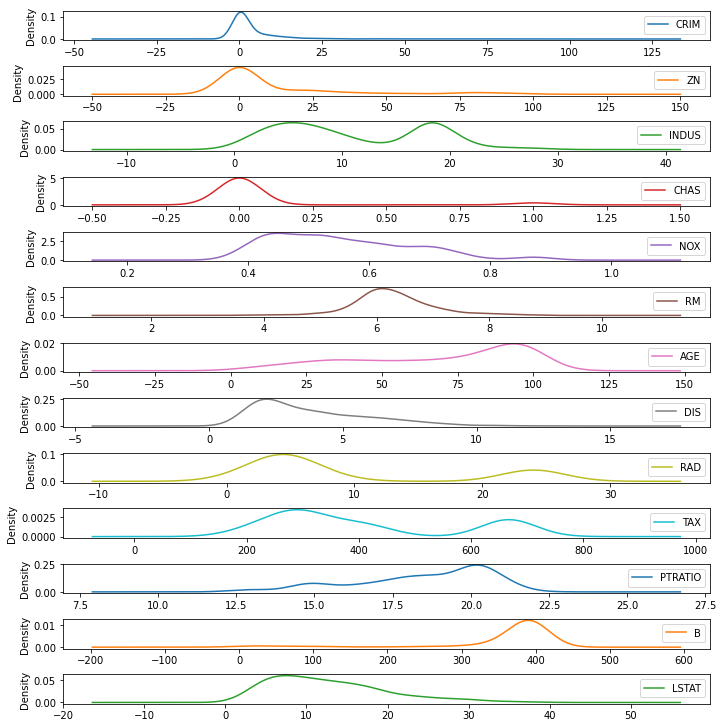

In [6]:
#density plots
data.plot(kind="density",subplots=True,sharex=False,figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.show()

<AxesSubplot:>

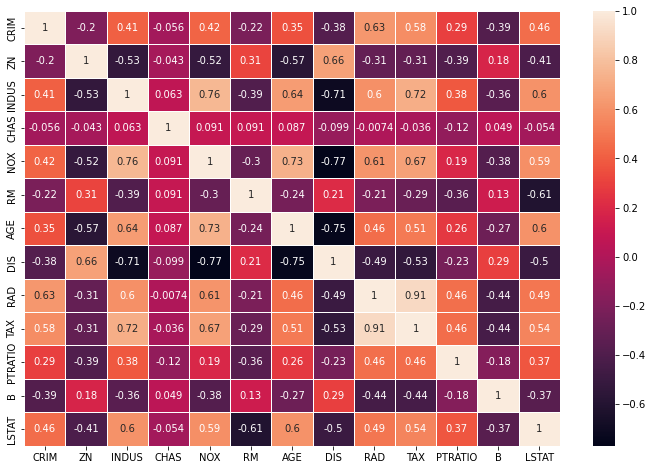

In [7]:
##plotting heatmap
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot=True, linewidths=0.8)

In [8]:
##drop tables from data and scaling features
data = data.drop(columns=["TAX"])
stsc = StandardScaler()
data = stsc.fit_transform(data)

In [9]:
##splittin dataset

X_train,X_test,Y_train,Y_test = train_test_split(data,MEDV, test_size=0.33)

In [10]:
## linear regressor model

from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.metrics import mean_squared_error , r2_score

def LinearModel(deg):
    ##polynomial feature created
    poly = PolynomialFeatures(degree = deg)
    
    #features fittted and transform
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    #linear model created
    LR = LinearRegression()
    LR.fit(X_train_poly,Y_train)
    
    Y_train_pred = LR.predict(X_train_poly)
    Y_test_pred = LR.predict(X_test_poly)
    
    #rmse and r2score calculated
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    r2_train = r2_score(Y_train,Y_train_pred)
    r2_test = r2_score(Y_test,Y_test_pred)
    
    return (rmse_train,r2_train,rmse_test,r2_test)



In [11]:
def ModelEval():
    evalu=[]
    for i in [1,2,3,6]:
        rmse_train,r2_train,rmse_test,r2_test=LinearModel(i)
        evalu.append((i,rmse_train,r2_train,rmse_test,r2_test))
    return evalu


In [12]:
evalu = ModelEval()
for i in evalu:
    print (i)

(1, 4.926389767789301, 0.7315846074418613, 4.420941950857535, 0.7285723610171928)
(2, 2.6467184689657026, 0.9225243240374078, 4.128070300371416, 0.7633434040315337)
(3, 2.0896588606331567e-12, 1.0, 72.01774394726661, -71.02835044100401)
(6, 1.7716329954188043e-12, 1.0, 466.1045886864377, -3016.1103944032943)


from the above data it is clearly known that degree 1 is underfitted, degree 2 is a good generalization, degree 3 and degree 6 are clearly overfitting models. Also from the r2 score it is clear that model 2 is the best, model 1 is somewhat good but model 3 and model 6 clearly do not follow the trend of the features and hence should not be used to predict.

In [13]:
##implementing lasso regression

def LassoModel(deg):
    ##polynomial feature created
    poly = PolynomialFeatures(degree = deg)
    
    #features fittted and transform
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    #linear model created
    LR = Lasso(normalize=True,alpha=0.01, max_iter=10000)
    LR.fit(X_train_poly,Y_train)
    
    Y_train_pred = LR.predict(X_train_poly)
    Y_test_pred = LR.predict(X_test_poly)
    
    #rmse and r2score calculated
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    r2_train = r2_score(Y_train,Y_train_pred)
    r2_test = r2_score(Y_test,Y_test_pred)
    
    return (rmse_train,r2_train,rmse_test,r2_test)


In [14]:
def LassoEval():
    evalu=[]
    for i in [1,2,3,6]:
        rmse_train,r2_train,rmse_test,r2_test=LassoModel(i)
        evalu.append((i,rmse_train,r2_train,rmse_test,r2_test))
    return evalu

In [15]:
evalu = LassoEval()
for i in evalu:
    print (i)

(1, 5.019356194580364, 0.721358428702058, 4.499677334372798, 0.718818211772821)
(2, 3.501480961971087, 0.8644019584684528, 3.0773609318597637, 0.8684831749402827)
(3, 3.0996166678251034, 0.8937409684468726, 2.8724296925110804, 0.8854161899605992)
(6, 2.867150925599679, 0.9090817668157464, 2.961716592509954, 0.8781820067524844)


Some real world application of regression is:
1) Predictive Analytics: predicting forecoming events.
2) New Insights: gives new insights to the unorganised data of an organsisation
3) Correcting Errors: statistical significance.
4) Operation Efficiency:  for increasing efficiency of a process.